<a href="https://colab.research.google.com/github/elephantcastle/machine-learning-grokking/blob/main/07_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ensemble methods** have been shown to overfit much less than other models. In a nutshell, it is easy for one model to overfit, but if you have several models for the same dataset, the combination of them overfits less. If one learner makes a mistake, the others tend to correct it, and on average, they work better.

**Bagging**: The strong learner is then formed as a combination of the weak models, and the prediction is done by voting (if it is a classification model) or averaging the predictions (if it is a regression model)

**Boosting**: Start by training a random model, which is the first weak learner. Evaluate it on the entire dataset. Shrink the points that have good predictions, and enlarge the points that have poor predictions. Train a second weak learner on this modified dataset. We continue in this fashion until we build several models.

**Learner**: which also refers to a machine learning model. In the literature, it is common to use the terms weak learner and strong learner when talking about ensemble methods. There is no difference between a machine learning model and a learner.

All these models work for regression and classification.
*   Random forests
*   AdaBoost
*   Gradient boosting
*   XGBoos

The way the strong learner makes predictions is by letting the weak learners
vote. The dataset is split in $n$ groups, $n$ simple classificator are build and the prediction the strong learner makes is the most common
output of the $n$.

# Random Forests

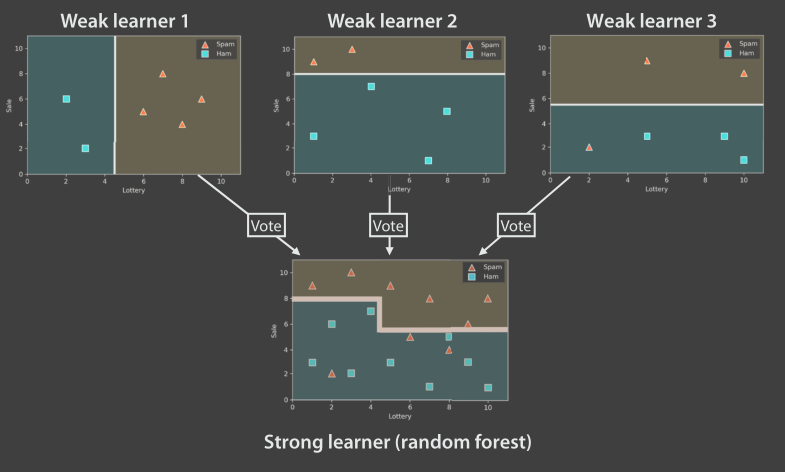

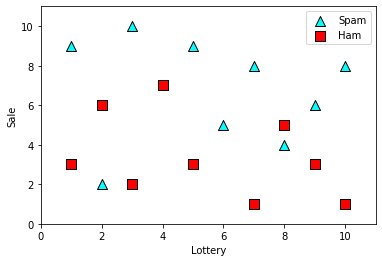

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
import utils

np.random.seed(0)
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])

features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

Decision Tree Classifier would overfit.

In [6]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

In [7]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


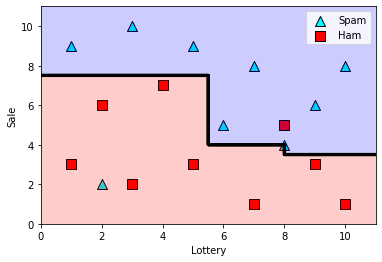

In [8]:
utils.plot_model(features, labels, random_forest_classifier)

This is each individual weak learner together with the classification tree.

****************************** Estimator ******************************


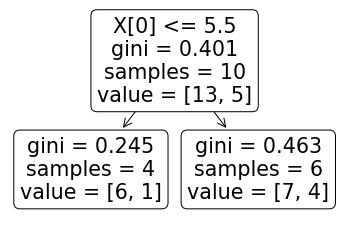

/content/utils.py:46: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)


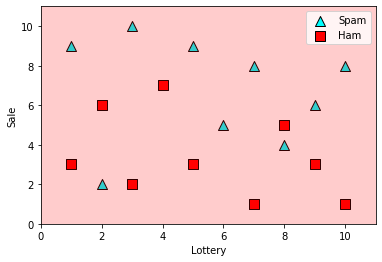

****************************** Estimator ******************************


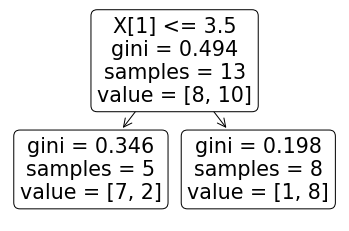

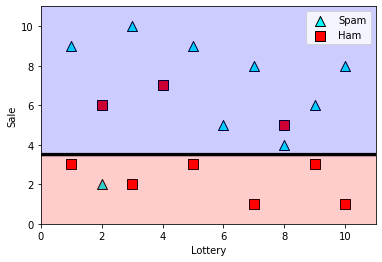

****************************** Estimator ******************************


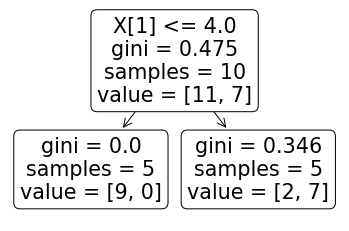

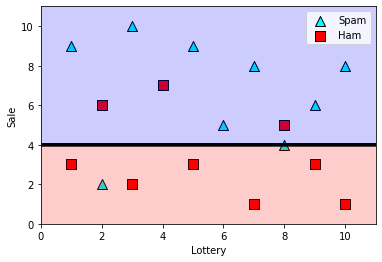

****************************** Estimator ******************************


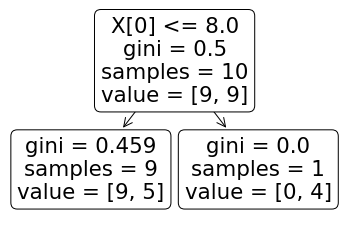

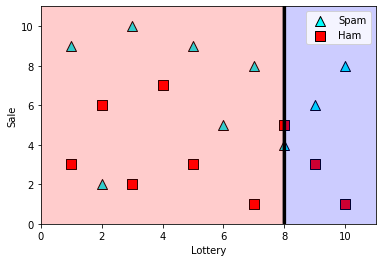

****************************** Estimator ******************************


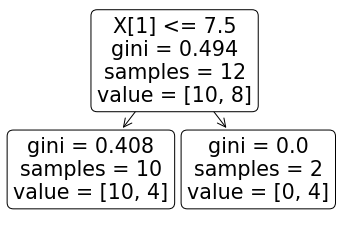

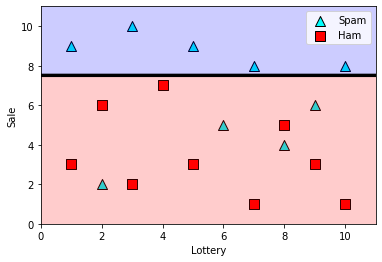

In [9]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()

# AdaBoost

In AdaBoost, like in random forests, each weak learner is a decision tree of depth 1. Unlike random forests, each weak learner is trained on the whole dataset, rather than on a portion of it.
The only caveat is that after each weak learner is trained, we modify the dataset by enlarging the points that have been incorrectly classified, so that future weak learners pay more attention to these.

Pseudocode for training an AdaBoost model
*   Assign weight 1 to each point of the dataset.
*   we want the weak learner for which the sum of the
weights of the correctly classified points is the highest.(first step will be normal classification as same weights)
*   Train the first weak learner on the first dataset.
*   Repeat the following step for each new weak learner:

*   Repeat the following step for each new weak learner:
   *   After a weak learner is trained, the points are modified as follows:
   *   The points that are incorrectly classified are enlarged by a rescaling factor equivalent to sum of the weights of the correctly classified points and the sum of the
weights of the incorrectly classified points
   *   Train a new weak learner on this modified dataset.

The idea is to get the classifiers to vote, just as they did in the random forest classifier, but this time, good learners get more of a say than poor learners. In the event that a classifier is really bad, then its vote will actually be negative.

The score of a weak learner is a number that has the following properties:
1. Is positive when the accuracy of the learner is greater than 0.5
2. Is 0 when the accuracy of the model is 0.5
3. Is negative when the accuracy of the learner is smaller than 0.5
4. Is a large positive number when the accuracy of the learner is close to 1
5. Is a large negative number when the accuracy of the learner is close to 0

\begin{align} 
  \text{log-odds}(x) = ln(\frac{ x }{ 1 - x}) 
\end{align}

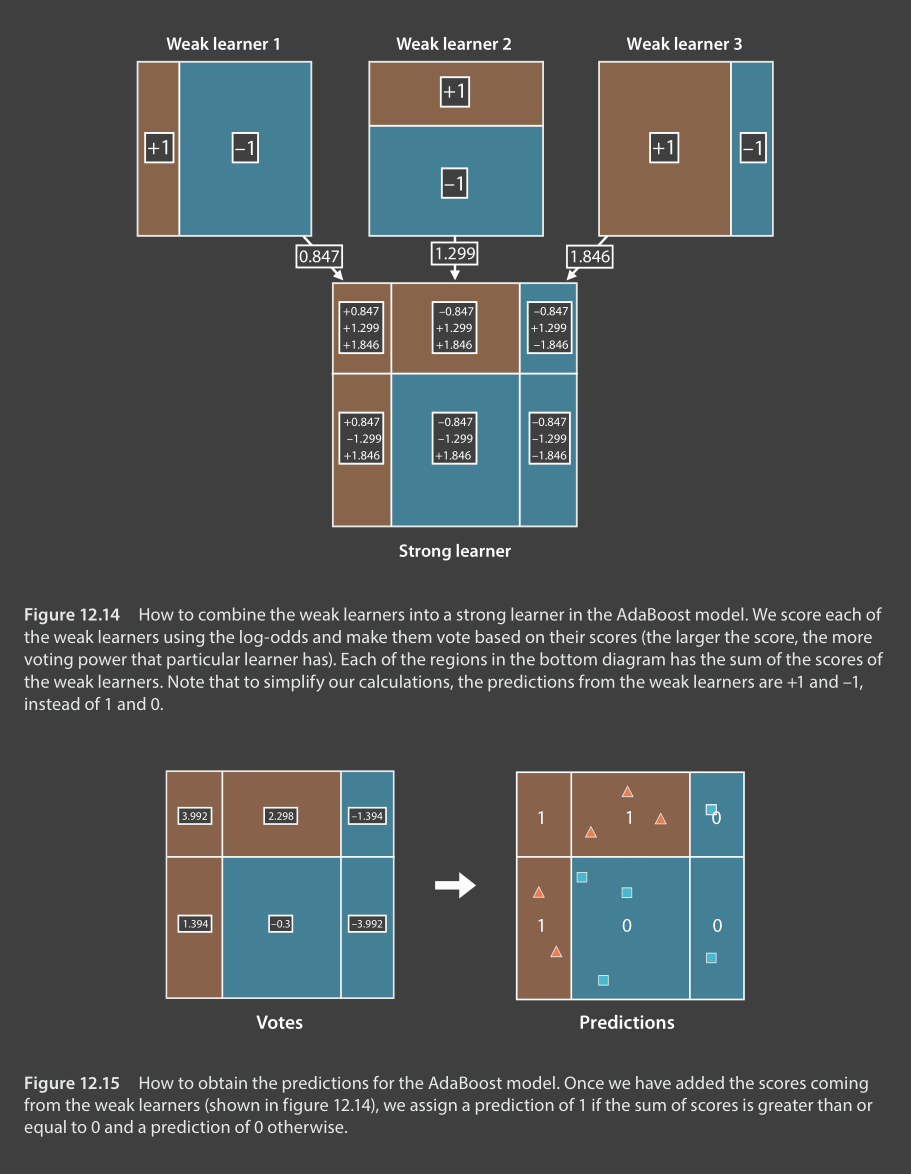

In [10]:
from sklearn.ensemble import AdaBoostClassifier
# Set the random_state so that we always get the same results
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=6)
adaboost_classifier.fit(features, labels)
adaboost_classifier.score(features, labels)

0.8888888888888888

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


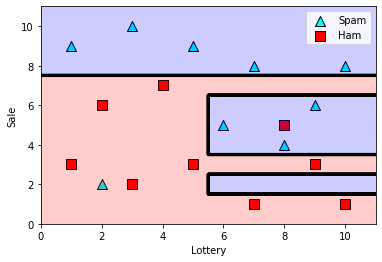

In [11]:
utils.plot_model(features, labels, adaboost_classifier)

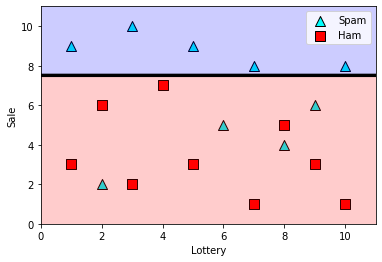

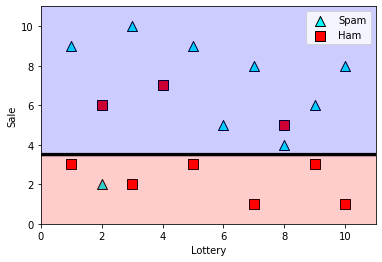

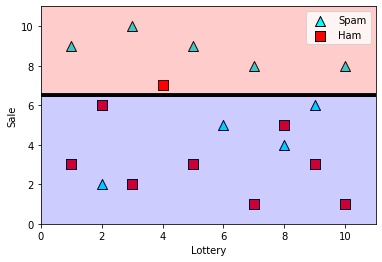

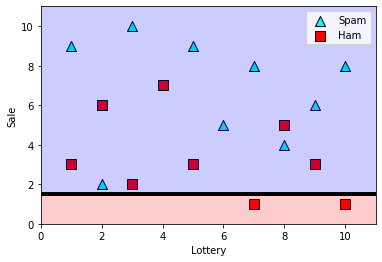

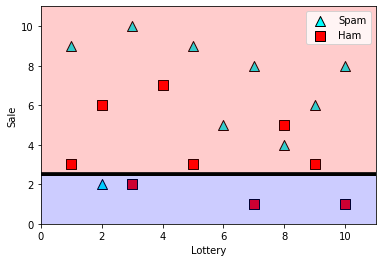

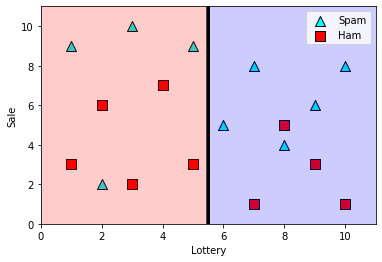

In [12]:
estimators = adaboost_classifier.estimators_
for estimator in estimators:
    utils.plot_model(features, labels, estimator)
    plt.show()

In [13]:
adaboost_classifier.estimator_weights_

array([1., 1., 1., 1., 1., 1.])

# Gradient boosting

The idea of gradient boosting is that we’ll create a sequence of trees that fit this dataset. The two hyperparameters that we’ll use for now are the number of trees, which we set to five, and the learning rate, which we set to 0.8. 
The first weak learner is simple: it is the decision tree of depth 0 that best fits the dataset. 

A decision tree of depth 0 is simply a node that assigns the same label to each point in the dataset. Because the error function we are minimizing is the mean square error, then this optimal value for the prediction is the average value of the labels. The average value of the labels of this dataset is 4, so our first weak learner is a node that assigns a prediction of 4 to every point.

The next step is to calculate the residual, which is the difference between the label and the
prediction made by this first weak learner, and fit a new decision tree to these residuals. As you can see, what this is doing is training a decision tree to fill in the gaps that the first tree has left.

The second weak learner is a tree that fits these residuals. The tree can be as deep as we’d like.

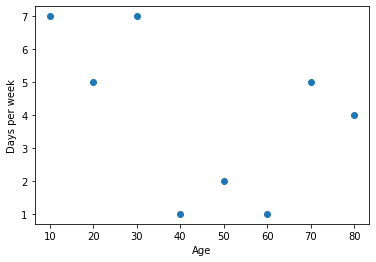

In [19]:
features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = np.array([7,5,7,1,2,1,5,4])

plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor(max_depth=2,
n_estimators=4, learning_rate=0.8)
gradient_boosting_regressor.fit(features, labels)
gradient_boosting_regressor.predict(features)

array([6.87466667, 5.11466667, 6.71466667, 1.43466667, 1.43466667,
       1.43466667, 4.896     , 4.096     ])


**************************************************

Weak learner 1
Residuals to predict: [ 3.  1.  3. -3. -2. -3.  1.  0.]
Predictions: [ 3.          2.          2.         -2.66666667 -2.66666667 -2.66666667
  0.5         0.5       ]


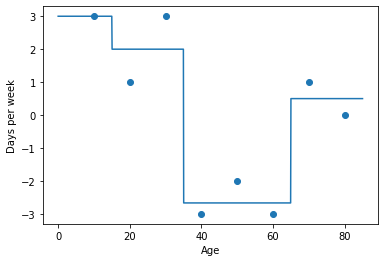

New residuals: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]

**************************************************

Weak learner 2
Residuals to predict: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]
Predictions: [ 0.          0.          1.4        -0.53333333 -0.53333333 -0.53333333
  0.1         0.1       ]


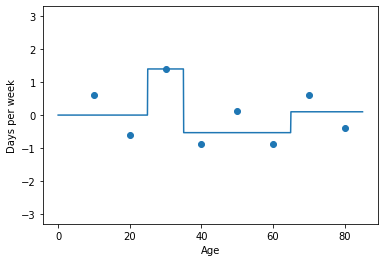

New residuals: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 3
Residuals to predict: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [ 6.00000000e-01 -6.00000000e-01 -7.40148683e-17 -7.40148683e-17
 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17]


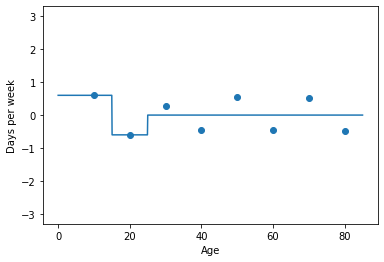

New residuals: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 4
Residuals to predict: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [-0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
  0.52       -0.48      ]


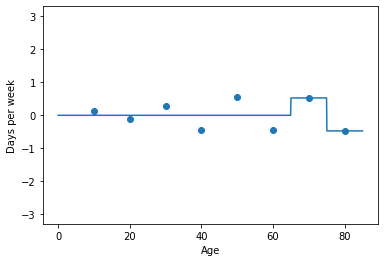

New residuals: [ 0.12533333 -0.11466667  0.28533333 -0.43466667  0.56533333 -0.43466667
  0.104      -0.096     ]


In [17]:
predictions_estimators = []
predictions = np.zeros(8)
centered_labels = labels-labels.mean()
residuals = [centered_labels]
for i in range(len(gradient_boosting_regressor.estimators_)):
    weak_learner = gradient_boosting_regressor.estimators_[i][0]
    print("\n"+"*"*50+"\n")
    print("Weak learner", i+1)
    preds = weak_learner.predict(features)
    predictions_estimators.append(preds)
    print("Residuals to predict:", residuals[-1])
    print("Predictions:", preds)
    predictions += preds*0.8
    #plt.scatter(features, predictions)
    #plt.scatter(features, residuals[-1])
    #plot_regressor(tree[0], features, centered_labels)
    plt.scatter(features, centered_labels, color='white')
    utils.plot_regressor(weak_learner, features, residuals[-1])
    plt.show()
    residuals.append(centered_labels-predictions)
    print("New residuals:", residuals[-1])


# XGBoost

Given a set ${a_1, a_2, …, a_n}$, the similarity score is:
\begin{align} 
  \text{Similarity} = \frac{ (a_1 + a_2 + … + a_n)^2 }{ n }
\end{align}

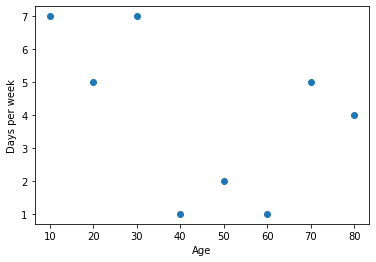

In [20]:
features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = np.array([7,5,7,1,2,1,5,4])

plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [22]:
import xgboost
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor(random_state=0,
                             n_estimators=3,
                             max_depth=2,
                             reg_lambda=0,
                             min_split_loss=1,
                             learning_rate=0.7)
xgboost_regressor.fit(features, labels)
xgboost_regressor.score(features, labels)

[23:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9438806326863372

We proceed to split the node using the age feature in all the possible ways, as we did with decision trees. For each split, we calculate the similarity score of the subsets corresponding to each of the leaves and add them. The one with the highest is the best split.

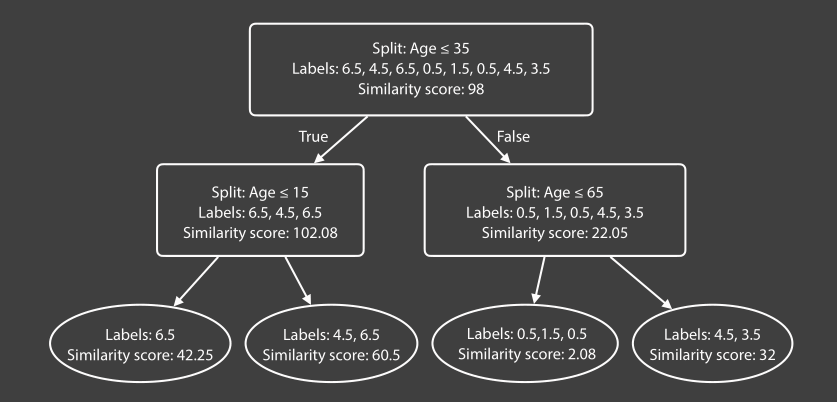